In [1]:
import sys
sys.path

['/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/home/revanth/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/revanth/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/revanth/.ipython']

In [2]:
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
import keras.backend as K
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("ProcessedFinalData.csv")

In [5]:
X = df.iloc[:, 2:-20]
y = df.iloc[:, -20:]

ValueError: cannot label index with a null key

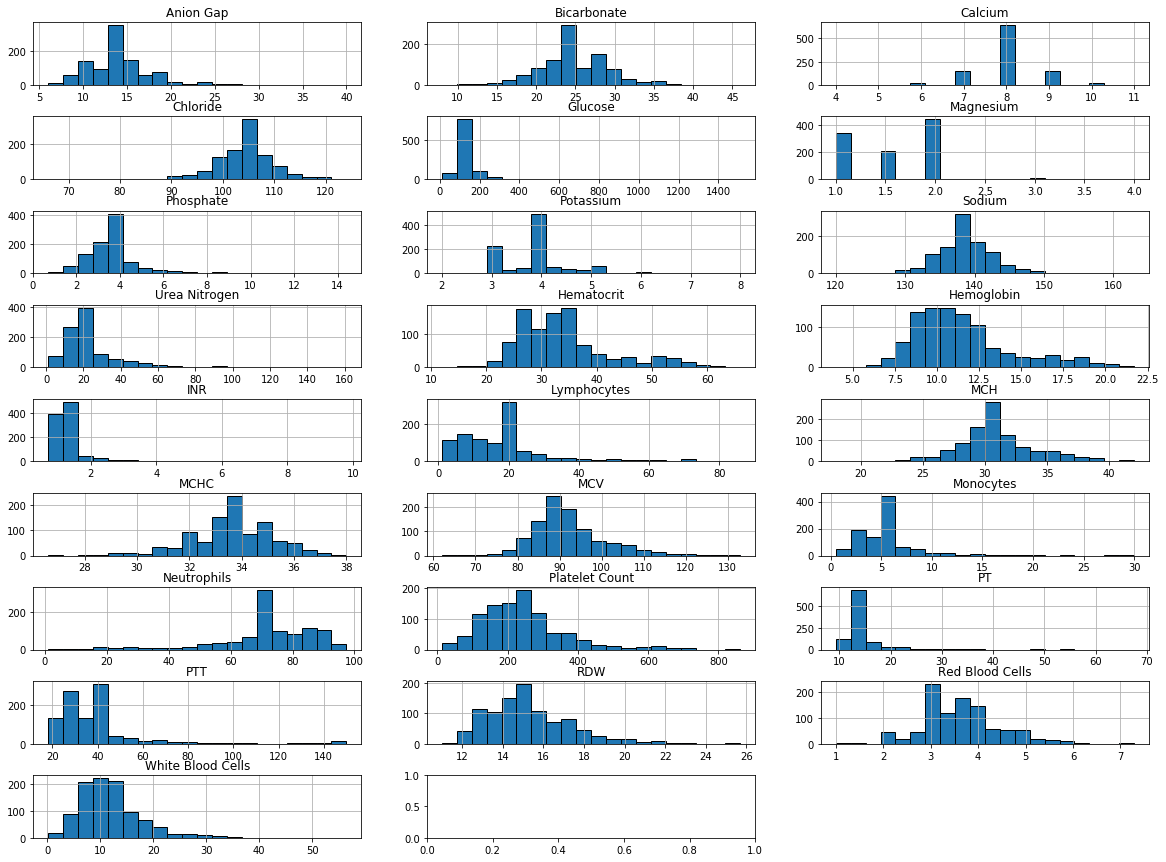

In [6]:
columns = X.columns
length = len(columns)
plt.subplots(figsize=(20,15))
length=len(df)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(9, 3, j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    X[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.savefig('feature_distribution.png')

IndexError: index 25 is out of bounds for axis 0 with size 25

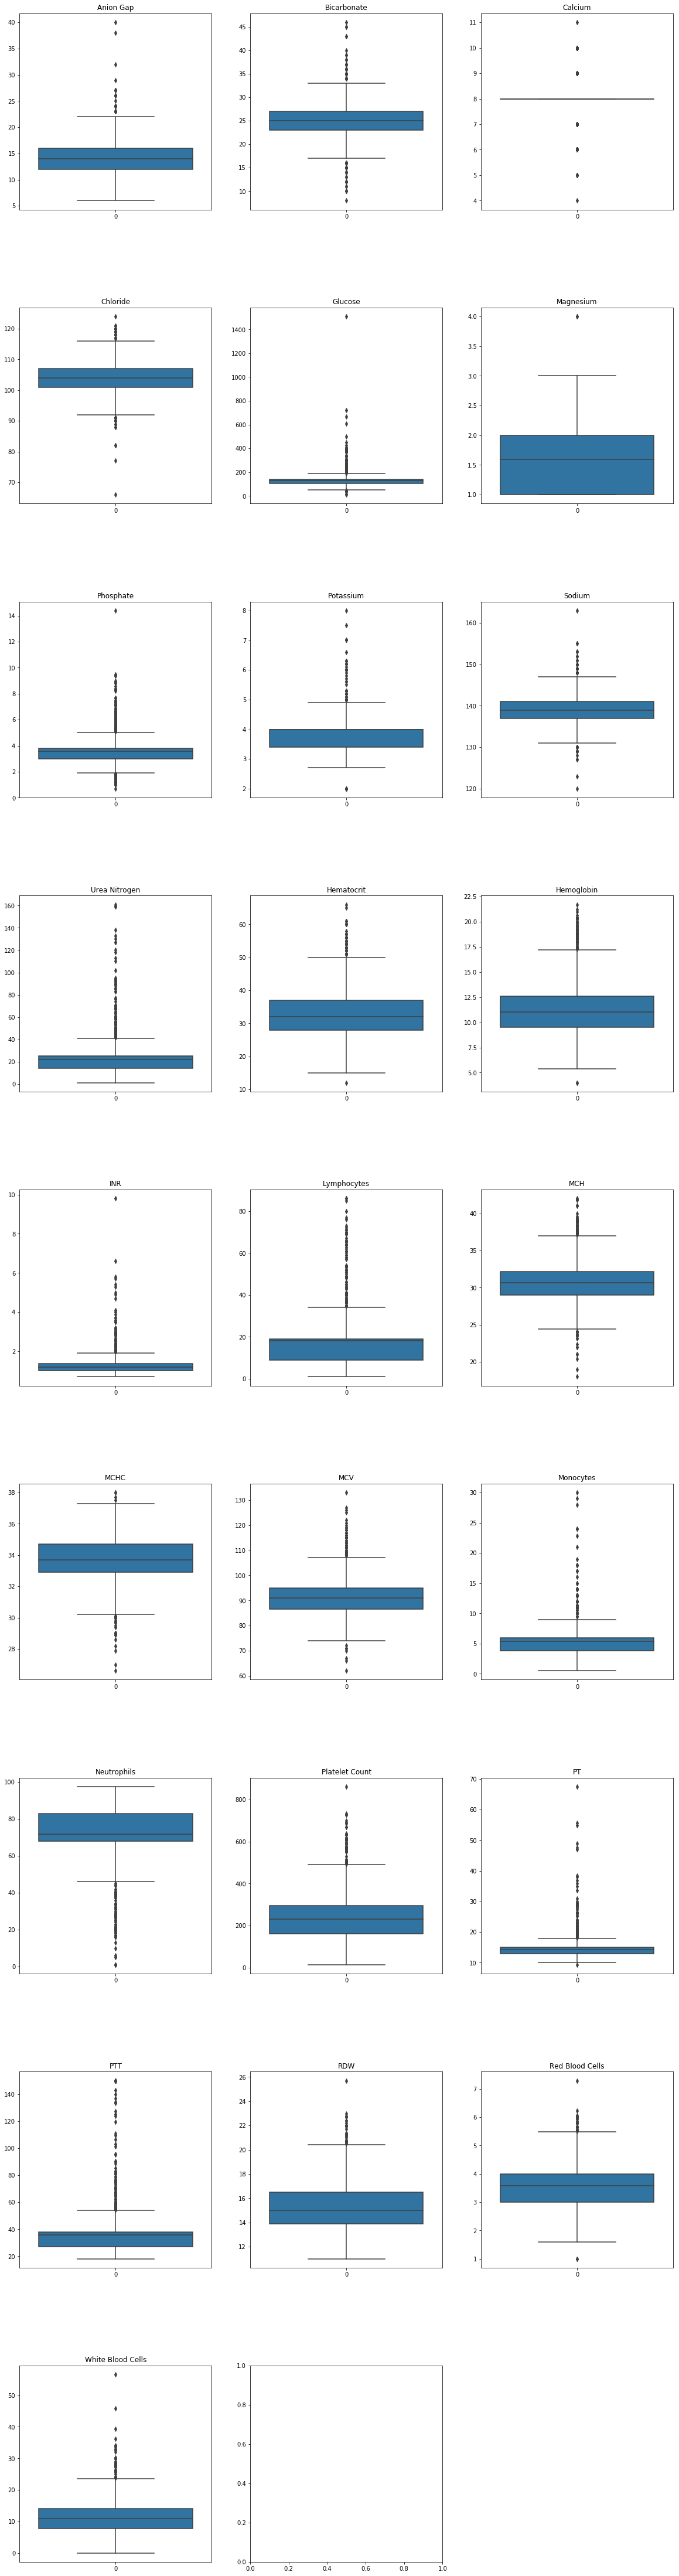

In [7]:
columns = X.columns
length = len(columns)
plt.subplots(figsize=(20,80))
length=len(X)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(9, 3, j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.boxplot(data=np.array(X[columns[j]]))
    plt.title(i)
plt.savefig('boxplot.png')

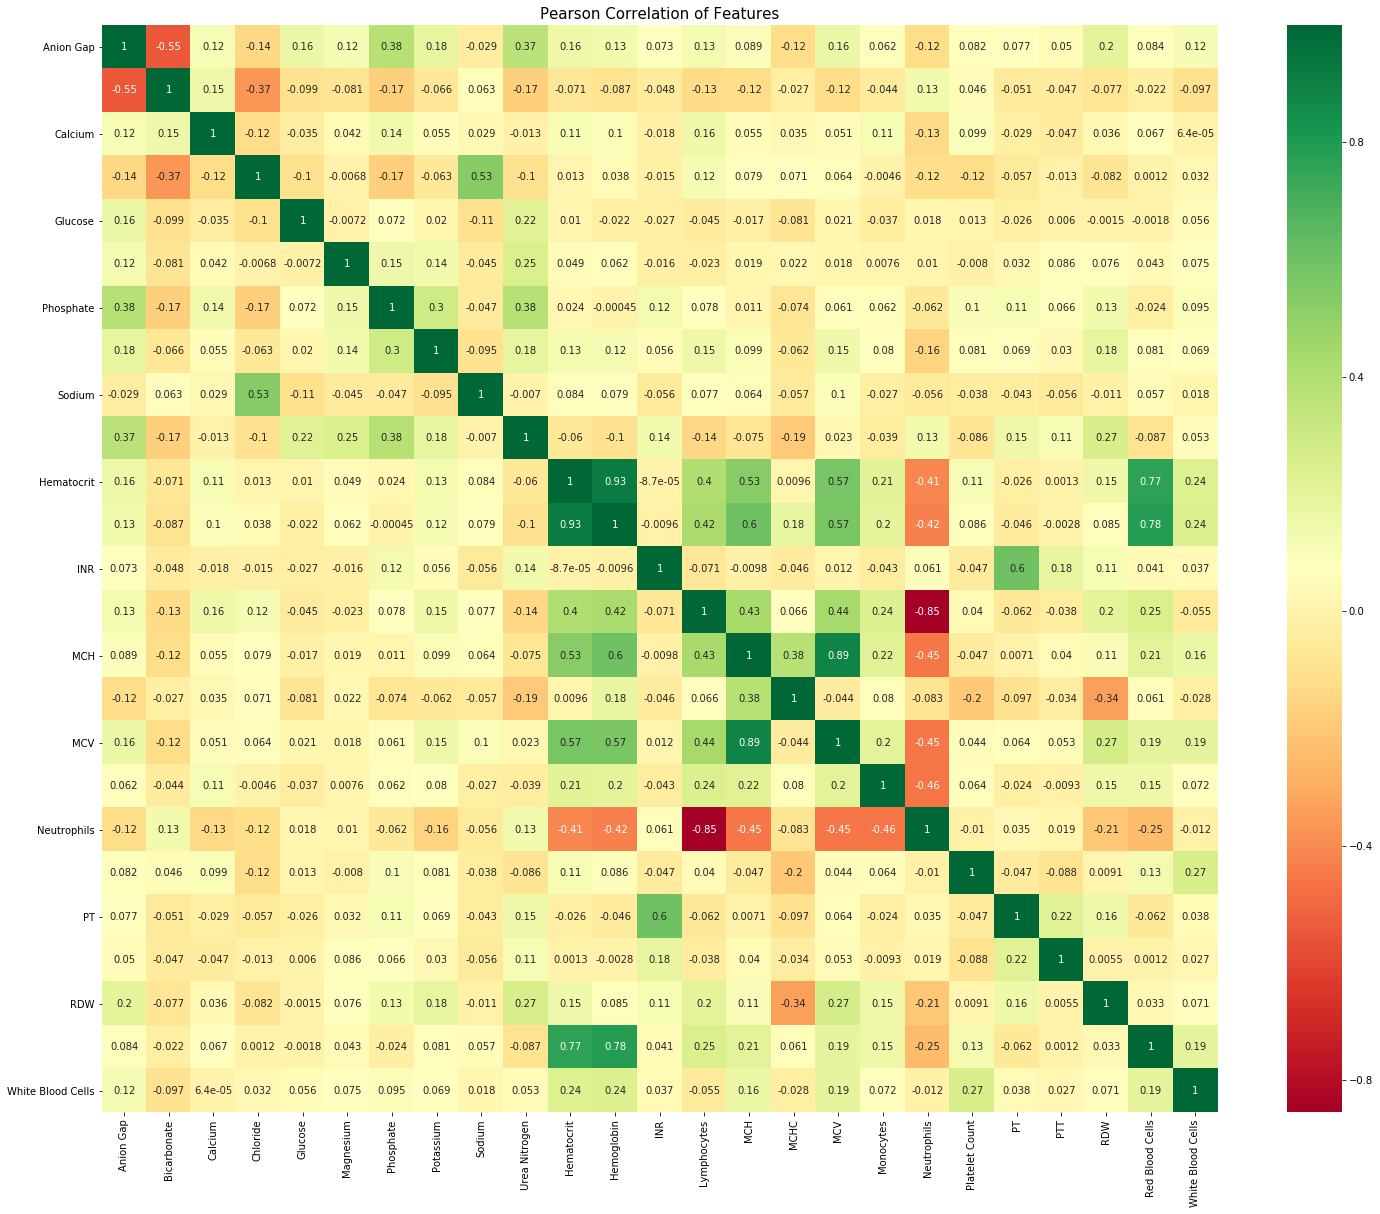

In [8]:
sns.heatmap(X[X.columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.savefig('pearson_correlation.png')

In [9]:
X.columns

Index(['Anion Gap', 'Bicarbonate', 'Calcium', 'Chloride', 'Glucose',
       'Magnesium', 'Phosphate', 'Potassium', 'Sodium', 'Urea Nitrogen',
       'Hematocrit', 'Hemoglobin', 'INR', 'Lymphocytes', 'MCH', 'MCHC', 'MCV',
       'Monocytes', 'Neutrophils', 'Platelet Count', 'PT', 'PTT', 'RDW',
       'Red Blood Cells', 'White Blood Cells'],
      dtype='object')

In [10]:
columns = ['MCH', 'Hematocrit', 'Hemoglobin', 'Neutrophils']
X_selective = X.drop(columns, axis=1)

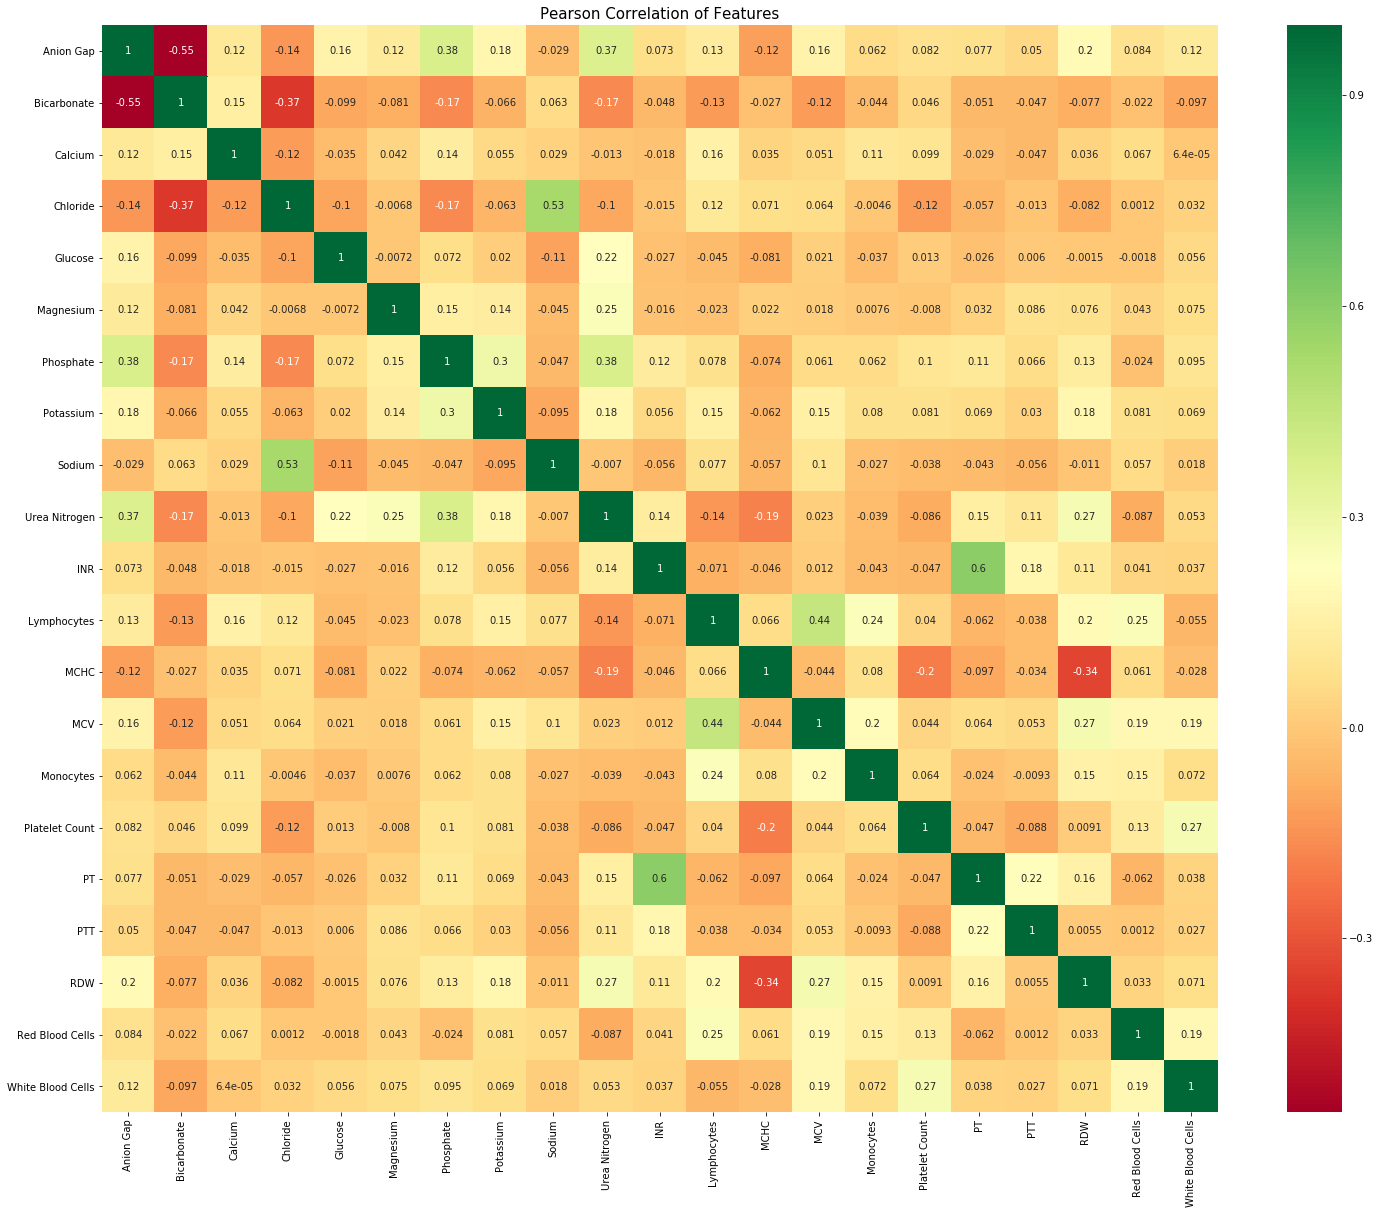

In [11]:
X_selective = pd.DataFrame(X_selective)
sns.heatmap(X_selective[X_selective.columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.savefig('pearson_correlation_selective.png')

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_selective = scaler.fit_transform(X_selective)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from keras.utils import to_categorical

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xs_train, xs_test, ys_train, ys_test = train_test_split(X_selective, y, test_size=0.2, random_state=0)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [16]:
model = Sequential()

In [17]:
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(64, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [18]:
from keras.utils import plot_model
plot_model(model,show_shapes=True, to_file='model.png')

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1300      
Total params: 7,124
Trainable params: 7,124
Non-trainable params: 0
_________________________________________________________________


In [20]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=100)

y_pred = model.predict(x_test, batch_size=100)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

Epoch 1/100
799/799 [==============================] - 1s 2ms/step - loss: 15.5462 - acc: 0.0275
Epoch 2/100
799/799 [==============================] - 0s 20us/step - loss: 14.3803 - acc: 0.2290
Epoch 3/100
799/799 [==============================] - 0s 21us/step - loss: 13.9162 - acc: 0.3342
Epoch 4/100
799/799 [==============================] - 0s 27us/step - loss: 13.6459 - acc: 0.3942
Epoch 5/100
799/799 [==============================] - 0s 22us/step - loss: 13.5153 - acc: 0.3855
Epoch 6/100
799/799 [==============================] - 0s 24us/step - loss: 13.4212 - acc: 0.3805
Epoch 7/100
799/799 [==============================] - 0s 22us/step - loss: 13.3437 - acc: 0.3730
Epoch 8/100
799/799 [==============================] - 0s 20us/step - loss: 13.2862 - acc: 0.3817
Epoch 9/100
799/799 [==============================] - 0s 25us/step - loss: 13.2410 - acc: 0.3617
Epoch 10/100
799/799 [==============================] - 0s 28us/step - loss: 13.2042 - acc: 0.3880
Epoch 11/100
799/799

799/799 [==============================] - 0s 25us/step - loss: 12.0953 - acc: 0.3479
Epoch 84/100
799/799 [==============================] - 0s 24us/step - loss: 12.0808 - acc: 0.3780
Epoch 85/100
799/799 [==============================] - 0s 26us/step - loss: 12.0703 - acc: 0.3542
Epoch 86/100
799/799 [==============================] - 0s 23us/step - loss: 12.0572 - acc: 0.3605
Epoch 87/100
799/799 [==============================] - 0s 18us/step - loss: 12.0435 - acc: 0.3592
Epoch 88/100
799/799 [==============================] - 0s 19us/step - loss: 12.0335 - acc: 0.3567
Epoch 89/100
799/799 [==============================] - 0s 18us/step - loss: 12.0175 - acc: 0.3504
Epoch 90/100
799/799 [==============================] - 0s 25us/step - loss: 12.0063 - acc: 0.3442
Epoch 91/100
799/799 [==============================] - 0s 21us/step - loss: 11.9957 - acc: 0.3554
Epoch 92/100
799/799 [==============================] - 0s 24us/step - loss: 11.9850 - acc: 0.3592
Epoch 93/100
799/799 [=

In [21]:
y_test.shape

(200, 20)

In [22]:
y_pred_neg = 1 - y_pred
y_test_neg = 1 - y_test
tp = K.eval(K.sum(y_test * y_pred))
tn = K.eval(K.sum(y_test_neg * y_pred_neg))
fp = K.eval(K.sum(y_test_neg * y_pred))
fn = K.eval(K.sum(y_test * y_pred_neg))
prec = tp / (tp + fp)
rec = tp / (tp + fn)
f1_score = 2 * prec * rec / (prec + rec)
roc = roc_auc_score(np.array(y_test),  np.array(y_pred))
print("precision: {}".format(prec))
print("recall: {}".format(rec))
print("f1_score: {}".format(f1_score))
print("roc: {}".format(roc))

precision: 0.8823529411764706
recall: 0.013054830287206266
f1_score: 0.025728987993138937
roc: 0.5029546575170695


In [23]:
model.evaluate(x_test, y_test, batch_size=100)

200/200 [==============================] - 0s 136us/step


[16.25596332550049, 0.24499999731779099]

In [24]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=21))
model.add(Dense(64, activation='relu'))
model.add(Dense(20, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(xs_train, ys_train,
          epochs=100,
          batch_size=100)

ys_pred = model.predict(xs_test, batch_size=100)
ys_pred[ys_pred >= 0.5] = 1
ys_pred[ys_pred < 0.5] = 0

Epoch 1/100
799/799 [==============================] - 0s 172us/step - loss: 15.3900 - acc: 0.0926
Epoch 2/100
799/799 [==============================] - 0s 20us/step - loss: 14.3042 - acc: 0.2716
Epoch 3/100
799/799 [==============================] - 0s 23us/step - loss: 14.0019 - acc: 0.2553
Epoch 4/100
799/799 [==============================] - 0s 25us/step - loss: 13.7857 - acc: 0.3179
Epoch 5/100
799/799 [==============================] - 0s 29us/step - loss: 13.6315 - acc: 0.3267
Epoch 6/100
799/799 [==============================] - 0s 26us/step - loss: 13.5084 - acc: 0.3267
Epoch 7/100
799/799 [==============================] - 0s 30us/step - loss: 13.4233 - acc: 0.3279
Epoch 8/100
799/799 [==============================] - 0s 32us/step - loss: 13.3547 - acc: 0.3429
Epoch 9/100
799/799 [==============================] - 0s 20us/step - loss: 13.2953 - acc: 0.3504
Epoch 10/100
799/799 [==============================] - 0s 21us/step - loss: 13.2526 - acc: 0.3605
Epoch 11/100
799/7

799/799 [==============================] - 0s 25us/step - loss: 12.1886 - acc: 0.3617
Epoch 84/100
799/799 [==============================] - 0s 21us/step - loss: 12.1801 - acc: 0.3755
Epoch 85/100
799/799 [==============================] - 0s 23us/step - loss: 12.1661 - acc: 0.3767
Epoch 86/100
799/799 [==============================] - 0s 20us/step - loss: 12.1578 - acc: 0.3517
Epoch 87/100
799/799 [==============================] - 0s 20us/step - loss: 12.1464 - acc: 0.3680
Epoch 88/100
799/799 [==============================] - 0s 22us/step - loss: 12.1347 - acc: 0.3817
Epoch 89/100
799/799 [==============================] - 0s 19us/step - loss: 12.1227 - acc: 0.3517
Epoch 90/100
799/799 [==============================] - 0s 19us/step - loss: 12.1122 - acc: 0.3855
Epoch 91/100
799/799 [==============================] - 0s 21us/step - loss: 12.0972 - acc: 0.3579
Epoch 92/100
799/799 [==============================] - 0s 20us/step - loss: 12.0898 - acc: 0.3579
Epoch 93/100
799/799 [=

In [25]:
ys_pred_neg = 1 - ys_pred
y_test_neg = 1 - y_test
tp = K.eval(K.sum(y_test * ys_pred))
tn = K.eval(K.sum(y_test_neg * ys_pred_neg))
fp = K.eval(K.sum(y_test_neg * ys_pred))
fn = K.eval(K.sum(y_test * ys_pred_neg))
prec = tp / (tp + fp)
rec = tp / (tp + fn)
f1_score = 2 * prec * rec / (prec + rec)
roc = roc_auc_score(np.array(y_test),  np.array(y_pred))
print("precision: {}".format(prec))
print("recall: {}".format(rec))
print("f1_score: {}".format(f1_score))
print("roc: {}".format(roc))

precision: 1.0
recall: 0.019147084421235857
f1_score: 0.03757472245943638
roc: 0.5029546575170695


In [26]:
model.evaluate(xs_test, ys_test, batch_size=100)

200/200 [==============================] - 0s 183us/step


[16.190651893615723, 0.22500000149011612]